# Areal data modelling

## Areal data

In spatial statistics, areal data refers to data that are aggregated or summarized within predefined geographic areas or regions, such as census tracts, zip code areas, counties, or administrative districts. Unlike point-referenced data, which represent individual locations with specific coordinates, areal data are associated with spatial units that cover an area on the map.

Examples of areal data include:

- Population counts: Total population counts within census tracts or administrative districts.
- Income levels: Median household income or per capita income within counties or zip code areas.
- Disease rates: Incidence or prevalence rates of diseases within specific regions.
- Crime rates: Number of reported crimes per capita within police precincts or neighborhoods.
- Environmental variables: Average temperature, precipitation, or air quality indices within specific geographic regions.
- Socioeconomic indicators: Education attainment levels, unemployment rates, poverty rates, etc., within administrative boundaries.

Areal data are commonly used in spatial statistics since this is commonly the level at which data are available, and, at the same time, modelling at areal level is useful since this is the level at which public policy decisions are commonly made.

In [15]:
#!pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from shapely.geometry import Polygon


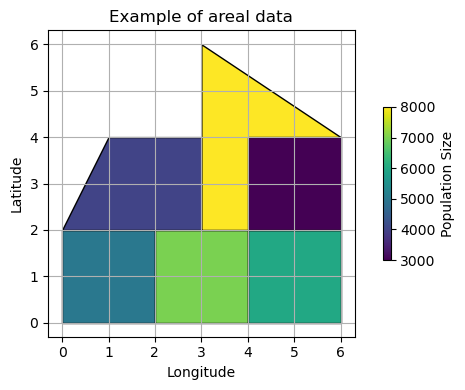

In [35]:
# Create a GeoDataFrame with administrative boundaries (made-up data for illustration)
data = {'geometry': [Polygon([(0, 0), (0, 2), (2, 2), (2, 0)]),  # Polygon 1
                     Polygon([(2, 0), (2, 2), (4, 2), (4, 0)]),  # Polygon 2
                     Polygon([(0, 2), (1, 4), (3, 4), (3, 2)]),  # Polygon 3
                     Polygon([(3, 2), (3, 6), (6, 4), (5, 2)]),  # Polygon 4
                     Polygon([(4, 0), (4, 2), (6, 2), (6, 0)]),  # Polygon 5
                     Polygon([(4, 2), (4, 4), (6, 4), (6, 2)])],  # Polygon 6
        'Name': ['Admin District 1', 'Admin District 2', 'Admin District 3',
                 'Admin District 4', 'Admin District 5', 'Admin District 6'],  # Names of admin districts
        'Population': [5000, 7000, 4000, 8000, 6000, 3000]}  # Population counts for each admin district

gdf_admin = gpd.GeoDataFrame(data)

# Plot the administrative boundaries with population size represented by color
fig, ax = plt.subplots(figsize=(6, 4))

# Define colormap
cmap = plt.cm.viridis  # Change the colormap here
norm = Normalize(vmin=gdf_admin['Population'].min(), vmax=gdf_admin['Population'].max())
sm = ScalarMappable(norm=norm, cmap=cmap)

# Plot each administrative boundary with color based on population size
for idx, row in gdf_admin.iterrows():
    color = sm.to_rgba(row['Population'])
    gdf_admin.iloc[[idx]].plot(ax=ax, color=color, edgecolor='black')

# Add colorbar with a shorter length
cbar = plt.colorbar(sm, shrink=0.5)  # Adjust the shrink parameter to change the length of the color bar
cbar.set_label('Population Size')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Example of areal data')
plt.grid(True)
plt.tight_layout()
plt.show()


## Models of areal data

In models for areal data, the geographic units are de- noted by $B_i$, and the data are typically sums or averages of variables over these blocks. To introduce spatial association, we define a neighborhood structure based on the arrangement of the blocks in the map. Once the neighborhood structure is defined, models resembling autoregressive time series models are considered, such as conditionally autoregressive modedl (CAR).

### CAR

The CAR model represents the spatial dependence among areal units in a Bayesian modelling framework. It describes the vector of spatially varying random effects $f = (f_1, ..., f_n)^T$ using the follwing prior:

 $$f \sim \mathcal{N}(0, Q^{-1}) $$






take data from here: https://hughst.github.io/week-7/